In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
exp_data=np.loadtxt('Calib_thermometer.txt')
theta=exp_data[:,0]
cc=exp_data[:,1]
nb=len(cc)

In [3]:
font=12

Text(0.5, 1.0, 'Temperature (in °C)')

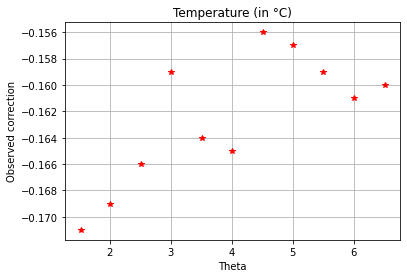

In [4]:
plt.plot(theta,cc,'* r')
plt.xlabel("Theta")
plt.ylabel("Observed correction")
plt.grid()
plt.savefig("disp.jpg")
plt.title("Temperature (in °C)")

In [5]:
c_t=sum(cc*theta)
c=sum(cc)
theta_s=sum(theta**2)
theta_1=sum(theta)
N=len(theta)

In [6]:
a=(c_t*N-c*theta_1)/(N*theta_s-(theta_1)**2)
b=(c*theta_s-c_t*theta_1)/(N*theta_s-(theta_1)**2)
print(a,b)

0.0021826977398872924 -0.17120379013135012


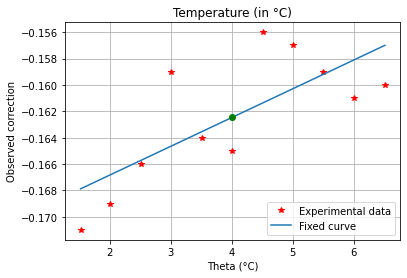

In [34]:
plt.plot(theta,cc,'* r')
plt.plot(theta,a*theta+b)
plt.plot(theta_1/len(theta)
,c/len(theta),'o g')
plt.xlabel("Theta (°C)")
plt.ylabel("Observed correction")
plt.grid()
plt.title("Temperature (in °C)")
plt.legend(['Experimental data','Fixed curve'],loc='lower right')
plt.savefig("disp.jpg")

In [44]:
mean_th=theta_1/len(theta)
mean_c=c/len(theta)

In [58]:
cc-mean_c

array([-0.00854545, -0.00654545, -0.00354545,  0.00345455, -0.00154545,
       -0.00254545,  0.00645455,  0.00545455,  0.00345455,  0.00145455,
        0.00245455])

In [80]:
np.sqrt(sum((cc-(a*theta+b))**2)/(len(theta)-2))

0.0034975639635052894

In [97]:
X=np.c_[theta,np.ones(nb)]
hessian=np.linalg.inv(np.dot(X.T,X))
np.dot(hessian,np.dot(X.T,cc))

array([ 0.0021827 , -0.17120379])